In [18]:
#import modulos 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [19]:
df = pd.read_csv("train_new.csv")
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_150000,0,11.2677,2.9361,8.9304,7.1718,12.6826,1.4096,5.5708,18.9360,...,8.2134,5.6091,1.0664,1.5259,13.5576,2.5019,-2.0697,9.6857,15.1098,17.4865
1,train_150001,0,9.1546,2.2189,7.5189,4.6808,10.2911,-11.7870,4.6796,17.1627,...,-1.5557,6.5153,-1.2182,-0.8338,16.1222,-0.6614,3.5941,8.8340,16.6121,10.2198
2,train_150002,0,11.4313,-5.1949,7.7460,11.4524,12.4896,-7.3724,6.0505,14.5978,...,0.7787,2.0775,2.1534,-5.2059,18.3996,0.7312,9.8636,9.7021,8.9396,-6.0436
3,train_150003,0,13.0385,1.1188,9.4104,5.8001,14.5713,10.0653,6.3155,15.8367,...,8.6692,4.4282,4.1775,5.4931,14.6043,-2.1328,3.3064,8.9362,13.9488,-22.6320
4,train_150004,0,9.7065,-4.6400,8.8325,6.5866,13.8771,-6.1068,4.6322,15.3737,...,4.6171,8.6005,5.5753,6.8578,14.3485,1.7902,-0.7680,7.9468,15.1672,-3.9796


In [20]:
print('Informação dos dados:')
df.info()
print('Descrição dos dados:')
df.describe()

print('numero de dados nulos:')
df.isna().sum().sum()

print('numero de dados dupicados:')
df.duplicated().sum().sum()

Informação dos dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 77.1+ MB
Descrição dos dados:
numero de dados nulos:
numero de dados dupicados:


0

ETA

C:\Users\jonat\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Target variable count')

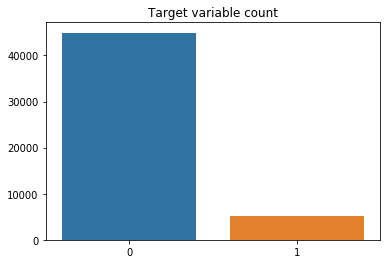

In [21]:
# variavel target 

x = df['target'].value_counts().values
sns.barplot([0,1], x)
plt.title('Target variable count')

Nota-se uma alto desbalanço no conjunto de dados para a variavel Target

In [22]:
# balanceando a variavel Target
from sklearn.utils import resample

t_0 = df[df.target == 0]
t_1 = df[df.target == 1]

t_0_balanced = resample(t_0, replace = False, n_samples = len(t_1), random_state = 13)

train_balanced = pd.concat([t_0_balanced, t_1])
train_balanced.target.value_counts()

0    5064
1    5064
Name: target, dtype: int64

C:\Users\jonat\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Target variable count')

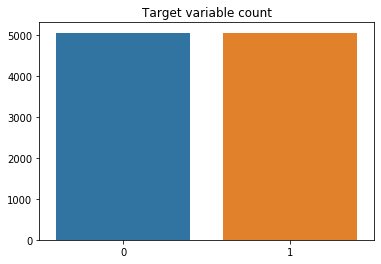

In [23]:
# variavel target 

x = train_balanced['target'].value_counts().values
sns.barplot([0,1], x)
plt.title('Target variable count')

In [24]:
X = train_balanced.drop(['ID_code', 'target'], axis=1)
y = train_balanced['target']

# Model training